In [11]:
import pandas as pd
import numpy as np
import wrangle

from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
train, validate, test = wrangle.wrangle_zillow()

Using cached csv


In [10]:
train.shape, validate.shape, test.shape

((1198531, 7), (513657, 7), (428047, 7))

In [9]:
train.head()

,bedroom,bathroom,square_ft,tax_value,year_built,tax,fips
1567874,3,1,1248,191578,1950,2712,6037
1218139,2,2,1326,1345206,1950,16539,6037
339661,2,1,1053,356648,1953,4575,6037
1017134,3,2,1256,175069,1946,2635,6037
40250,3,2,1640,543000,1957,6344,6059


In [61]:
train.describe().apply(lambda s: s.apply(lambda x: format(x,'g')))

,bedroom,bathroom,square_ft,tax_value,year_built,tax,fips
count,1.19853e+06,1.19853e+06,1.19853e+06,1.19853e+06,1.19853e+06,1.19853e+06,1.19853e+06
mean,3.30149,2.18728,1864.36,461370,1960.95,5624.86,6048.3
std,0.93279,0.97518,1391.05,688919,22.1434,7940.15,20.3458
min,0,0,1,22,1801,6,6037
25%,3,2,1258,189293,1949,2541,6037
50%,3,2,1623,328628,1958,4114,6037
75%,4,3,2208,535000,1976,6415,6059
max,15,32,952576,9.01885e+07,2016,1.0781e+06,6111


## Min-Max Scaling

In [53]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaled = scaler.fit(X_train)
scaled

MinMaxScaler()

In [54]:
train_scaled = scaler.transform(X_train)
validate_scaled = scaler.transform(X_validate)
test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'Scaled')

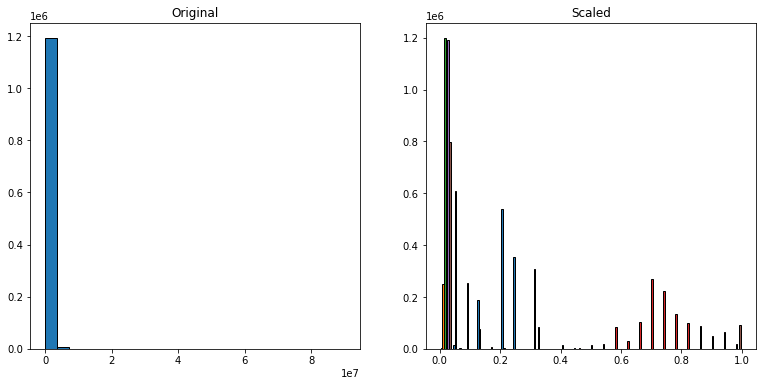

In [55]:
plt.figure(figsize = (13, 6))
plt.subplot(121)
plt.hist(train.tax_value, bins = 25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins = 25, ec='black')
plt.title('Scaled')

## Standard Scaler

In [46]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [48]:
train_scaled = scaler.transform(X_train)
validate_scaled = scaler.transform(X_validate)
test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'Scaled')

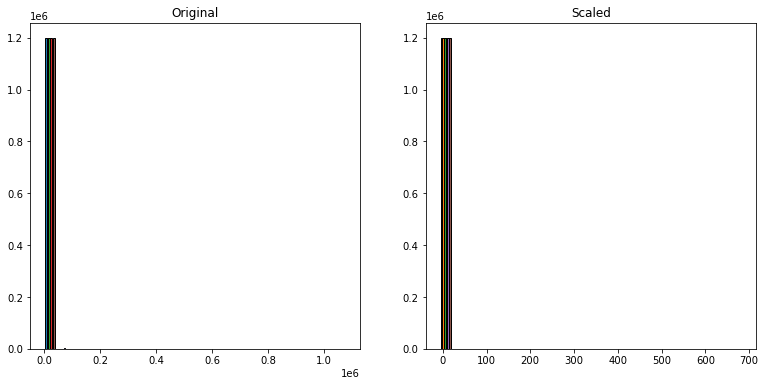

In [49]:
plt.figure(figsize = (13,6))
plt.subplot(121)
plt.hist(X_train, bins = 25, ec = 'black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins = 25, ec = 'black')
plt.title('Scaled')